In [27]:
import cv2
import os
import matplotlib.pyplot as plt
import time

def feature_matching_live_feed(left_folder, right_folder,display_matches=True,verbose=False):
    # Get sorted lists of image file names
    left_images = sorted([img for img in os.listdir(left_folder) if img.endswith(('.png', '.jpg'))])
    right_images = sorted([img for img in os.listdir(right_folder) if img.endswith(('.png', '.jpg'))])

    # Ensure both folders have the same number of images
    num_images = min(len(left_images), len(right_images))

    # Initialize the SIFT detector
    detector = cv2.SIFT_create()

    # Initialize the matcher
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

    #Initialize time counters
    total_time = 0.0
    frame_count = 0

    #Initialize match counters
    total_matches = 0
    frame_count = 0
    zero_match_frames = 0

    #Store matches
    stored_matches = []
    for i in range(num_images):

        start_time = time.time()  # Start time measurement
        # Read the left and right images
        img_left = cv2.imread(os.path.join(left_folder, left_images[i]), cv2.IMREAD_GRAYSCALE)
        img_right = cv2.imread(os.path.join(right_folder, right_images[i]), cv2.IMREAD_GRAYSCALE)

        if img_left is None or img_right is None:
            print(f"Error reading images: {left_images[i]} or {right_images[i]}")
            continue

        # Detect keypoints and compute descriptors
        kp1, des1 = detector.detectAndCompute(img_left, None)
        kp2, des2 = detector.detectAndCompute(img_right, None)

        if des1 is None or des2 is None:
            print(f"No descriptors found in images: {left_images[i]} or {right_images[i]}")
            zero_match_frames += 1
            frame_count += 1

            #Clarify that there were no matches on this image
            stored_matches.append(0)

            continue

        # Match descriptors
        matches = bf.match(des1, des2)

        num_matches = len(matches)
        
        if num_matches == 0:
            zero_match_frames += 1

        total_matches +=num_matches

        # Sort matches by distance (best matches first)
        matches = sorted(matches, key=lambda x: x.distance)

        # Draw the top N matches
        N_MATCHES = 50
        img_matches = cv2.drawMatches(img_left, kp1, img_right, kp2, matches[:N_MATCHES], None, flags=2)

        #Display the matches if specified
        if display_matches:
            plt.figure(figsize=(15, 10))
            plt.imshow(img_matches)
            plt.title(f'Feature Matches for frame {i}')
            plt.axis('off')
            plt.show()

        end_time = time.time()  # End time measurement

        # Update timing variables
        frame_time = end_time - start_time
        total_time += frame_time
        frame_count += 1

        if verbose:
            print(f"Processed frame {i+1}/{num_images} in {frame_time:.4f} seconds")

        #store the image matches
        stored_matches.append(img_matches)

    #Remove all winds opened by opencv (e.g. imshow)
    average_fps = frame_count / total_time
    print(f"\nAverage FPS: {average_fps:.2f}")

    average_matches = total_matches / frame_count
    print(f"\nAverage number of matches per image pair: {average_matches:.2f}")
    print(f"Number of image pairs with zero matches: {zero_match_frames}")

    cv2.destroyAllWindows()

    return stored_matches

def display_nth_image_matches(image_matches,selected_image):
    
    selected_match = image_matches[selected_image]

    if isinstance(selected_match,int):
        print('The selected image has no matches')
    else:
        plt.figure(figsize=(15, 10))
        plt.imshow(selected_match, cmap='gray')
        plt.title(f'Feature Matches for frame {selected_image}')
        plt.axis('off')
        plt.show()



Average FPS: 16.17

Average number of matches per image pair: 89.40
Number of image pairs with zero matches: 0


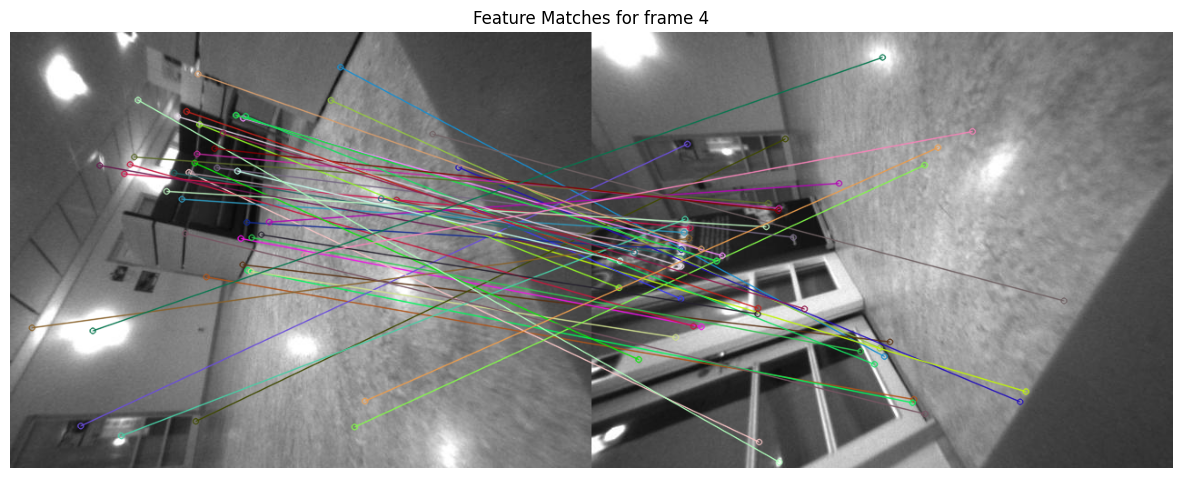

In [29]:
right_folder = r"datasets\custom_dataset\right"
left_folder = r"datasets\custom_dataset\left"

img_matches_custom = feature_matching_live_feed(left_folder, right_folder,display_matches=False)
display_nth_image_matches(img_matches_custom,4)


Average FPS: 9.35

Average number of matches per image pair: 578.65
Number of image pairs with zero matches: 0


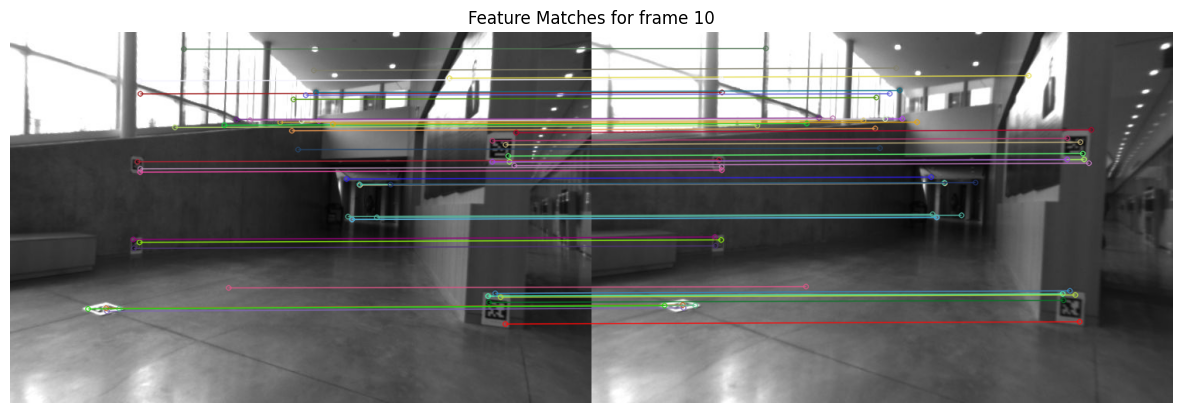

In [30]:
left_folder = r"datasets\PennCOSYVIO_dataset\left_cam_frames"
right_folder = r"datasets\PennCOSYVIO_dataset\right_cam_frames"

img_matches_penn = feature_matching_live_feed(left_folder, right_folder,display_matches=False)
display_nth_image_matches(img_matches_penn,10)